In [4]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
import numpy as np
print(x_train.shape)
num_labels=len(np.unique(y_train))
print(num_labels)

(60000, 28, 28)
10


In [6]:
from keras.utils import to_categorical
print(y_train[0])
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
image_size=x_train.shape[1]
print(image_size)

28


In [8]:
#samples, time step, features
x_train=np.reshape(x_train,[-1,image_size,image_size])
x_test=np.reshape(x_test,[-1,image_size,image_size])
print(x_train.shape)
print(x_train.ndim)

(60000, 28, 28)
3


In [9]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [10]:
#model is RNN with 256 units, input is 28-ndim vector 28 timesteps
input_shape=(image_size,image_size)
batch_size=128
units=256
dropout=0.2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


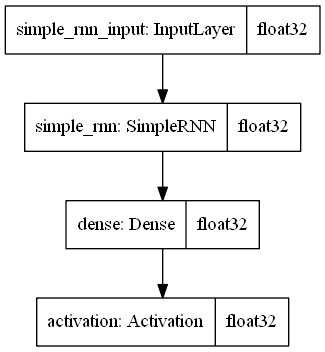

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation, SimpleRNN
from keras.utils import plot_model
model=Sequential()
model.add(SimpleRNN(units=units,dropout=dropout,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model,to_file='rnn-mnist.png',show_dtype=True)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 53s 105ms/step - loss: 1.1541 - accuracy: 0.6568
Epoch 2/20
469/469 [==============================] - 50s 107ms/step - loss: 0.3493 - accuracy: 0.8998
Epoch 3/20
469/469 [==============================] - 56s 120ms/step - loss: 0.2540 - accuracy: 0.9243
Epoch 4/20
469/469 [==============================] - 53s 113ms/step - loss: 0.2009 - accuracy: 0.9390
Epoch 5/20
469/469 [==============================] - 58s 125ms/step - loss: 0.1660 - accuracy: 0.9508
Epoch 6/20
469/469 [==============================] - 64s 136ms/step - loss: 0.1475 - accuracy: 0.9568
Epoch 7/20
469/469 [==============================] - 56s 119ms/step - loss: 0.1335 - accuracy: 0.9603
Epoch 8/20
469/469 [==============================] - 59s 127ms/step - loss: 0.1257 - accuracy: 0.9620
Epoch 9/20
469/469 [==============================] - 67s 142ms/step - loss: 0.1145 - accuracy: 0.9648
Epoch 10/20
469/469 [==============================] - 58s 123ms/step - l

In [15]:
loss,acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 4s 37ms/step - loss: 0.0623 - accuracy: 0.9792

Test accuracy: 97.9%
